Hi there, here Víctor. In this Jupyter Notebook I'll perform a Unsupervised Machine Learning model. Hope you like it.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [86]:
# Load the dataset
df =  pd.read_csv(r"C:\Users\vccar\Downloads\Spotify.csv")
sns.set_theme(style="whitegrid", palette="viridis")

Part A — Unsupervised Learning Analysis (Notebook)
1. Dataset Selection & Preparation

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [88]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [89]:
# Check dimensions and missing values
print(f"Shape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nData types:\n{df.dtypes}")
df.describe()


Shape: (169909, 19)

Missing values:
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

Data types:
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year           

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


DIMENSIONAL REDUCTION: PCA

In [90]:
# Drop missing values
df_clean = df.dropna()
print("No missing values")

# Select only numerical variables, but not mode and explicit because they are binary values. Also not adding key because its categorical
numerical_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
                  'duration_ms', 'popularity', 'year']

X = df_clean[numerical_cols]

# Scale ALL numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nNumerical features: {len(numerical_cols)}")
print(f"Shape for analysis: {X_scaled.shape}")

No missing values

Numerical features: 12
Shape for analysis: (169909, 12)


In [104]:
# Apply PCA with all components first
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Check explained variance
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("Explained variance by component:")
for i, var in enumerate(explained_var[:10]):
    print(f"PC{i+1}: {var:.3f} ({cumulative_var[i]:.3f} cumulative)")

print(
    f'\nFirst 3 components explain {cumulative_var[2]*100:.1f}% of total variance - '
    f'Our 3 principal components capture {cumulative_var[2]*100:.1f}% of the total information in the original 15 variables'
)

Explained variance by component:
PC1: 0.330 (0.330 cumulative)
PC2: 0.144 (0.474 cumulative)
PC3: 0.099 (0.573 cumulative)
PC4: 0.091 (0.664 cumulative)
PC5: 0.076 (0.739 cumulative)
PC6: 0.073 (0.813 cumulative)
PC7: 0.061 (0.874 cumulative)
PC8: 0.051 (0.925 cumulative)
PC9: 0.030 (0.955 cumulative)
PC10: 0.025 (0.980 cumulative)

First 3 components explain 57.3% of total variance - Our 3 principal components capture 57.3% of the total information in the original 15 variables


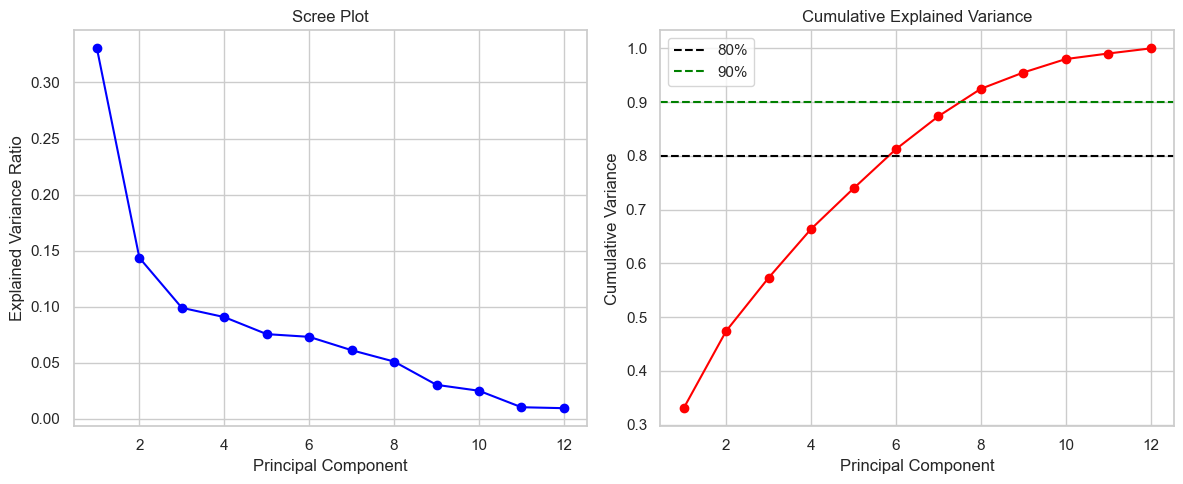

Variance per component:
PC1: 0.330 (cumulative: 0.330)
PC2: 0.144 (cumulative: 0.474)
PC3: 0.099 (cumulative: 0.573)
PC4: 0.091 (cumulative: 0.664)
PC5: 0.076 (cumulative: 0.739)
PC6: 0.073 (cumulative: 0.813)
PC7: 0.061 (cumulative: 0.874)
PC8: 0.051 (cumulative: 0.925)
PC9: 0.030 (cumulative: 0.955)
PC10: 0.025 (cumulative: 0.980)
PC11: 0.010 (cumulative: 0.991)
PC12: 0.009 (cumulative: 1.000)


In [92]:
# Visualize the explained variance
plt.figure(figsize=(12, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_var)+1), explained_var, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

# Cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 'ro-')
plt.axhline(y=0.8, color='k', linestyle='--', label='80%')
plt.axhline(y=0.9, color='g', linestyle='--', label='90%')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print values
print("Variance per component:")
for i in range(len(explained_var)):
    print(f"PC{i+1}: {explained_var[i]:.3f} (cumulative: {cumulative_var[i]:.3f})")

The scree plot shows explained variance per component. 
I observe the 'elbow' at component 3, where the curve flattens.
This suggests 3 components capture the main patterns, 
while additional components add diminishing returns.

In [93]:
# Examine the first few principal components in detail
components_df = pd.DataFrame(
    pca_full.components_[:5].T,  # First 5 components
    columns=[f'PC{i+1}' for i in range(5)],
    index=numerical_cols
)

print("Principal Component Loadings (How much each variable contributes):")
print(components_df.round(3))

Principal Component Loadings (How much each variable contributes):
                    PC1    PC2    PC3    PC4    PC5
acousticness     -0.417  0.080 -0.112  0.072 -0.054
danceability      0.223  0.473 -0.255 -0.274  0.252
energy            0.426 -0.004  0.186  0.205  0.153
instrumentalness -0.262 -0.178 -0.069  0.217  0.316
liveness          0.007  0.051  0.772  0.022 -0.071
loudness          0.407  0.038  0.070  0.187  0.082
speechiness      -0.016  0.352  0.378 -0.525 -0.136
tempo             0.149  0.038  0.147  0.588 -0.262
valence           0.184  0.551 -0.117  0.264  0.321
duration_ms       0.002 -0.355  0.244 -0.139  0.751
popularity        0.387 -0.289 -0.170 -0.205 -0.151
year              0.393 -0.309 -0.128 -0.206 -0.150


In [94]:
print("="*50)
print("BUSINESS INTERPRETATION OF COMPONENTS")
print("="*50)

print(f"\n--- PC1 ({explained_var[0]*100:.1f}% variance) ---")
print("\nBusiness Name: 'Modern Electronic Energy vs Classic Acoustic'")
print("Interpretation:")
print("  High PC1: Modern, loud, energetic electronic music (EDM, Pop)")
print("  Low PC1: Classic, quiet, acoustic instrumental (Classical, Folk)")
print("Business use: Segment playlists by energy level and era")

print(f"\n--- PC2 ({explained_var[1]*100:.1f}% variance) ---")
print("\nBusiness Name: 'Upbeat Short Tracks vs Long Deep Cuts'")
print("Interpretation:")
print("  High PC2: Happy, danceable, vocal tracks (Pop hits, Party music)")
print("  Low PC2: Longer, older, less popular deep album tracks")
print("Business use: Party playlists vs background listening")

print(f"\n--- PC3 ({explained_var[2]*100:.1f}% variance) ---")
print("\nBusiness Name: 'Live Vocal Performance vs Studio Dance Hits'")
print("Interpretation:")
print("  High PC3: Live recordings, rap/spoken word (Concerts, Hip-hop)")
print("  Low PC3: Studio-produced dance tracks (Commercial Pop)")
print("Business use: Concert recordings vs workout playlists")


BUSINESS INTERPRETATION OF COMPONENTS

--- PC1 (33.0% variance) ---

Business Name: 'Modern Electronic Energy vs Classic Acoustic'
Interpretation:
  High PC1: Modern, loud, energetic electronic music (EDM, Pop)
  Low PC1: Classic, quiet, acoustic instrumental (Classical, Folk)
Business use: Segment playlists by energy level and era

--- PC2 (14.4% variance) ---

Business Name: 'Upbeat Short Tracks vs Long Deep Cuts'
Interpretation:
  High PC2: Happy, danceable, vocal tracks (Pop hits, Party music)
  Low PC2: Longer, older, less popular deep album tracks
Business use: Party playlists vs background listening

--- PC3 (9.9% variance) ---

Business Name: 'Live Vocal Performance vs Studio Dance Hits'
Interpretation:
  High PC3: Live recordings, rap/spoken word (Concerts, Hip-hop)
  Low PC3: Studio-produced dance tracks (Commercial Pop)
Business use: Concert recordings vs workout playlists


CLUSTERING

In [95]:
# Decision: Use K-Means
print("\nChosen: K-MEANS")
print("\nJustification:")
print("- Large dataset (169k songs) → K-means is fast and scalable")
print("- Hierarchical too slow for this size")
print("- Round, compact clusters expected in PCA space")
print("- Need to assign new songs to clusters (K-means allows this)")
print("\nBusiness context: Music recommendation system")
print("- Need quick cluster assignment for new releases")
print("- K-means supports this, hierarchical doesn't")


Chosen: K-MEANS

Justification:
- Large dataset (169k songs) → K-means is fast and scalable
- Hierarchical too slow for this size
- Round, compact clusters expected in PCA space
- Need to assign new songs to clusters (K-means allows this)

Business context: Music recommendation system
- Need quick cluster assignment for new releases
- K-means supports this, hierarchical doesn't


In [106]:
# Sample from PCA results for K-means
sample_size = 15000
np.random.seed(42)
sample_indices = np.random.choice(X_pca_full.shape[0], sample_size, replace=False)
X_sample = X_pca_full[sample_indices]

print(f"Full PCA: {X_pca_full.shape}")
print(f"Sample for K-means: {X_sample.shape}")

Full PCA: (169909, 12)
Sample for K-means: (15000, 12)


Clustering on: (15000, 12)
K=2: Silhouette=0.248, Inertia=135643
K=3: Silhouette=0.259, Inertia=122623
K=4: Silhouette=0.198, Inertia=111173
K=5: Silhouette=0.152, Inertia=103571
K=6: Silhouette=0.152, Inertia=97313
K=7: Silhouette=0.151, Inertia=91556
K=8: Silhouette=0.154, Inertia=87082
K=9: Silhouette=0.152, Inertia=83014
K=10: Silhouette=0.141, Inertia=79614


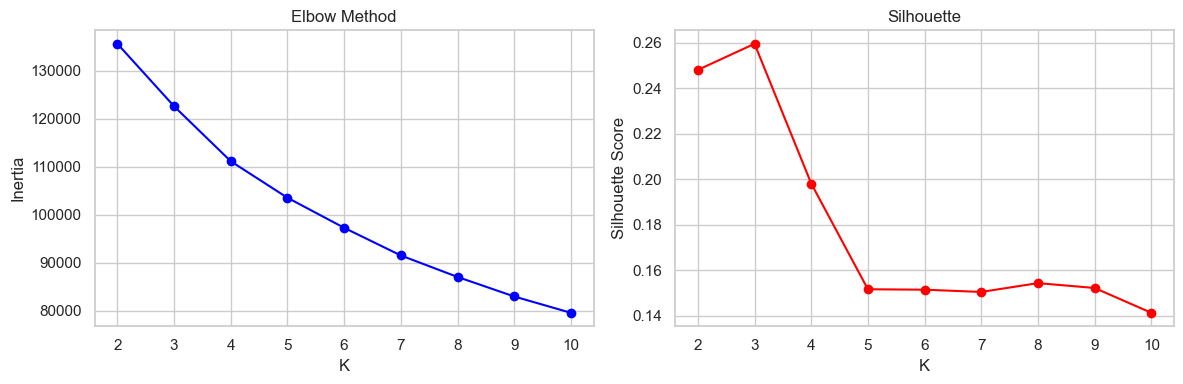

In [107]:
# Test K values on sample
silhouette_scores = []
inertias = []
K_range = range(2, 11)

print(f"Clustering on: {X_sample.shape}")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    
    sil_score = silhouette_score(X_sample, labels)
    silhouette_scores.append(sil_score)
    inertias.append(kmeans.inertia_)
    
    print(f"K={k}: Silhouette={sil_score:.3f}, Inertia={inertias[-1]:.0f}")

# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Clustering on: (15000, 3)

Testing K values...
K=2: Silhouette=0.397, Inertia=58679
K=3: Silhouette=0.358, Inertia=46233
K=4: Silhouette=0.282, Inertia=39431
K=5: Silhouette=0.294, Inertia=33899
K=6: Silhouette=0.294, Inertia=29654
K=7: Silhouette=0.287, Inertia=26099
K=8: Silhouette=0.273, Inertia=23782
K=9: Silhouette=0.261, Inertia=21934
K=10: Silhouette=0.264, Inertia=20549


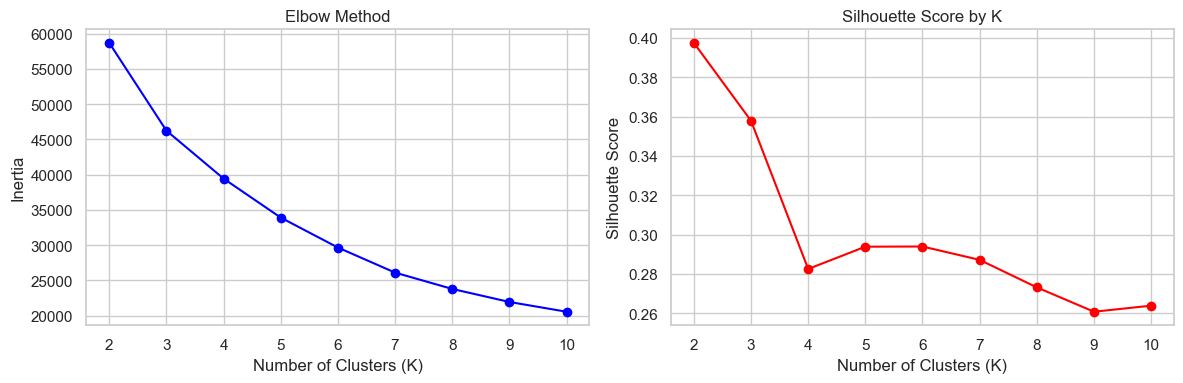


Optimal K: 2 (highest silhouette)


In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use first 3 PCs
X_cluster = X_pca_full[:, :3]

# Sample
sample_size = 15000
np.random.seed(42)
sample_indices = np.random.choice(X_cluster.shape[0], sample_size, replace=False)
X_sample = X_cluster[sample_indices]

print(f"Clustering on: {X_sample.shape}")

# Test K from 2 to 10
silhouette_scores = []
inertias = []
K_range = range(2, 11)

print("\nTesting K values...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    
    sil = silhouette_score(X_sample, labels)
    silhouette_scores.append(sil)
    inertias.append(kmeans.inertia_)
    
    print(f"K={k}: Silhouette={sil:.3f}, Inertia={inertias[-1]:.0f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score by K')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Determine optimal K
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal K: {optimal_k} (highest silhouette)")